In [1]:
'''
THE CHALLENGE

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic
sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone
onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people
were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what
sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socioeconomic class, etc).
'''

'\nTHE CHALLENGE\n\nThe sinking of the Titanic is one of the most infamous shipwrecks in history.\nOn April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic\nsank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone\nonboard, resulting in the death of 1502 out of 2224 passengers and crew.\nWhile there was some element of luck involved in surviving, it seems some groups of people\nwere more likely to survive than others.\nIn this challenge, we ask you to build a predictive model that answers the question: “what\nsorts of people were more likely to survive?” using passenger data (ie name, age, gender, socioeconomic class, etc).\n'

In [2]:
'''
VARIABLE NOTES

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
'''

'\nVARIABLE NOTES\n\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.\n'

In [3]:
# import library pandas

import pandas as pd

In [4]:
# import library visualisasi data

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [8]:
# load data

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [9]:
# cek data latih

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# cek data tes

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
train.shape

(891, 12)

In [15]:
test.shape

(418, 11)

In [16]:
# cek missing value data latih

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# cek missing value data tes

test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Sex dan Survive

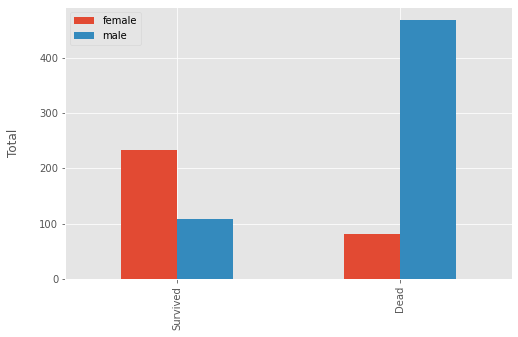

In [18]:
sur = train[train["Survived"]==1]["Sex"].value_counts()
ded = train[train["Survived"]==0]["Sex"].value_counts()

dz = pd.DataFrame([sur, ded])
dz.index = ['Survived', 'Dead']
dz.plot(kind='bar', figsize=(8,5))

plt.ylabel('Total\n',fontsize = 12)
plt.show()

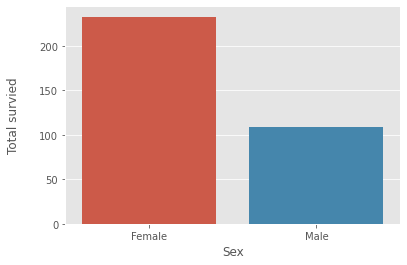

In [19]:
y_ind = list(train[train["Survived"]==1]["Sex"].value_counts())
ind = ['Female', 'Male']

sns.barplot(x = ind, y = y_ind)

plt.xlabel('Sex',fontsize = 12)
plt.ylabel('Total survied\n',fontsize = 12)
plt.show()

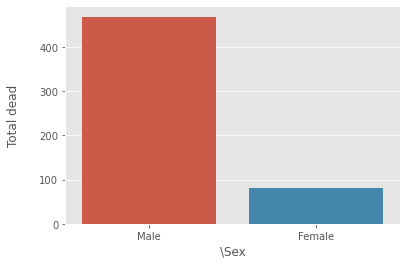

In [20]:
y_ded = list(train[train["Survived"]==0]["Sex"].value_counts())
ded = ["Male", "Female"]

sns.barplot(x = ded, y = y_ded)

plt.xlabel('\Sex',fontsize = 12)
plt.ylabel('Total dead\n',fontsize = 12)
plt.show()

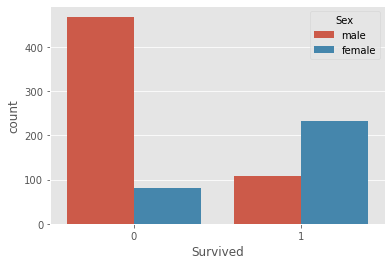

In [21]:
sns.countplot(x = "Survived", data = train, hue = "Sex")
plt.show()

In [28]:
# Dari visualisasi beberapa gambar di atas, dapat diamati bahwa
# jumlah laki-laki yang hidup lebih sedikit daripada perempuan
# dari sini, kita dapat buat kolom baru mengenai laki-laki atau perempuan
# Contoh: Mr. -> laki-laki , Mrs., Miss. -> perempuan, 

train_test_data = [train, test] # gabung data latih dan tes

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [29]:
dataset['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs
...,...
413,Mr
414,Dona
415,Mr
416,Mr


In [30]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Lady          1
Countess      1
Jonkheer      1
Sir           1
Don           1
Mme           1
Ms            1
Name: Title, dtype: int64

In [31]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [32]:
# mapping berdasarkan tingkat survived
# Mr, Master menjadi 0
# Miss, Mlle, Ms menjadi 1
# Mrs, Mme, Lady menjadi 2
# lainnya menjadi 3

ubah_title = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3,
                 "Rev": 3,"Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3,
                 "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(ubah_title)
    
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


#### Cabin

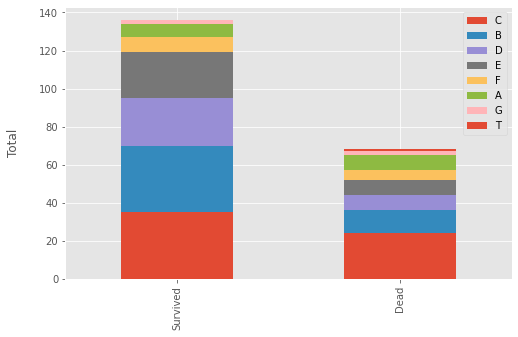

In [33]:
# grup berdasarkan cabin

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]


cabin1 = train[train["Survived"]==1]["Cabin"].value_counts()
cabin0 = train[train["Survived"]==0]["Cabin"].value_counts()

dc = pd.DataFrame([cabin1, cabin0])
dc.index = ['Survived', 'Dead']
dc.plot(kind = "bar", stacked = True, figsize=(8,5))

plt.ylabel('Total\n', fontsize = 12)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

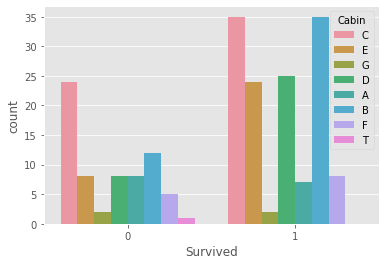

In [34]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

In [35]:
train.Cabin.value_counts()

# hal ini belum menunjukkan yang tidak punya cabin (missing value)

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

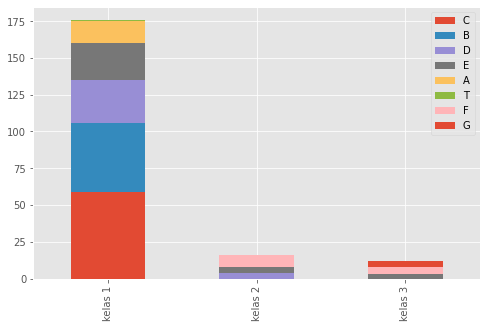

In [36]:
pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([pclass1, pclass2, pclass3])
df.index = ['kelas 1','kelas 2', 'kelas 3']
df.plot(kind='bar',stacked=True, figsize=(8,5))

plt.show()

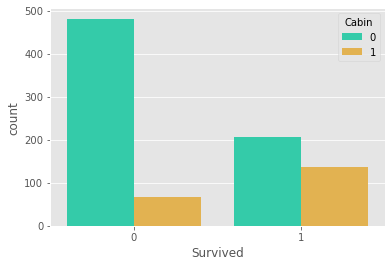

In [37]:
# mencoba melihat yang tidak memiliki nilai cabin apakah banyak survived apa tidak

train["Cabin"] = train["Cabin"].fillna(0)

for i in range(len(train)):
    if (train.at[i,"Cabin"]!=0):
        train.at[i,"Cabin"] = 1
 
sns.countplot(x = "Survived", hue = "Cabin", data= train, palette = "turbo")
plt.show()

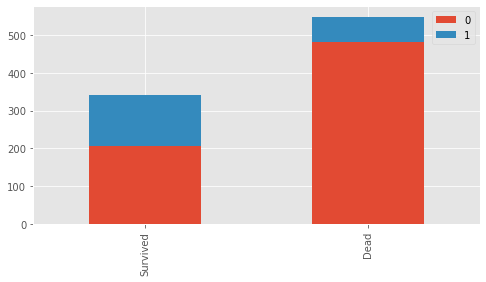

In [38]:
# berdasarkan plot di atas, yang tidak memiliki cabin (0) banyak yang meninggal dibandingkan tidak memiliki cabin
# jadi, disini diasumsikan yang tidak memiliki cabin = 0 dan memiliki cabin = 1

survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()

df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]

df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))
plt.show()

berikut ini visualisasi yang survive dan meninggal berdasarkan ada tidaknya cabin

In [39]:
train[train["Survived"]==1]["Cabin"].value_counts()

0    206
1    136
Name: Cabin, dtype: int64

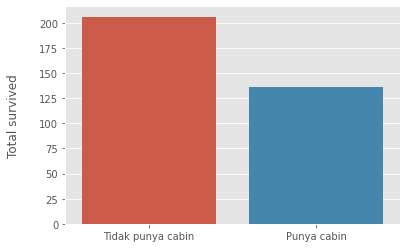

In [40]:
y_cabin = list(train[train["Survived"]==1]["Cabin"].value_counts())
ded = ["Tidak punya cabin", "Punya cabin"]

sns.barplot(x = ded, y = y_cabin)

plt.ylabel('Total survived\n',fontsize = 12)
plt.show()

In [41]:
train[train["Survived"]==0]["Cabin"].value_counts()

0    481
1     68
Name: Cabin, dtype: int64

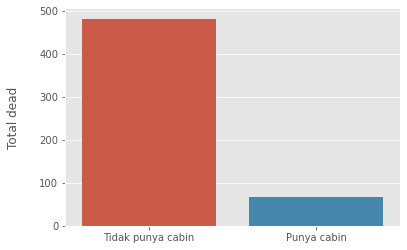

In [42]:
y_cabin = list(train[train["Survived"]==0]["Cabin"].value_counts())
ded = ["Tidak punya cabin", "Punya cabin"]

sns.barplot(x = ded, y = y_cabin)

plt.ylabel('Total dead\n',fontsize = 12)
plt.show()

Diamati bahwa yang tidak punya cabin, jumlah meninggal lebih tinggi daripada jumlah bertahan.

Yang punya cabin, jumlah bertahan lebih tinggi daripada jumlah meninggal

Hal ini sudah logis

In [43]:
# mengubah data test

test["Cabin"] = test["Cabin"].fillna(0)

for i in range(len(test)):
    if (test.at[i,"Cabin"]!=0):
        test.at[i,"Cabin"] = 1

#### Melihat visualisasi PClass

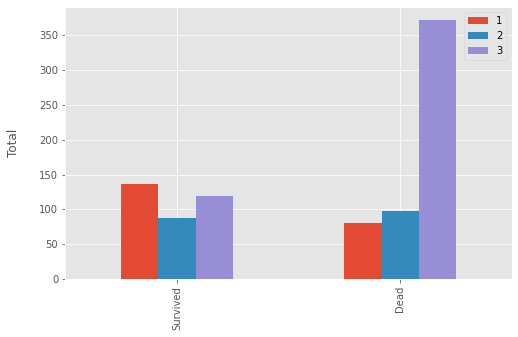

In [44]:
p_class1 = train[train["Survived"]==1]["Pclass"].value_counts()
p_class0 = train[train["Survived"]==0]["Pclass"].value_counts()

dp = pd.DataFrame([p_class1, p_class0])
dp.index = ['Survived', 'Dead']
dp.plot(kind = "bar", figsize=(8,5))

plt.ylabel('Total\n',fontsize = 12)
plt.show()

Disini memang benar logis bahwa kelas 1 akan memiliki kesempatan bertahan hidup lebih tinggi. Akibatnya jumlah individu yang bertahan di kelas 1 harus lebih tinggi dari kelas lainnya. Dapat diamati pula bahwa untuk kelas 3, banyak individu yang meninggal. Sehingga untuk feature PClass ini merupakan faktor yang penting dalam menentukan tingkat atau kesempatan bertahan hidup dan tidak perlu untuk diubah.

#### Hubungan Age dan PClass

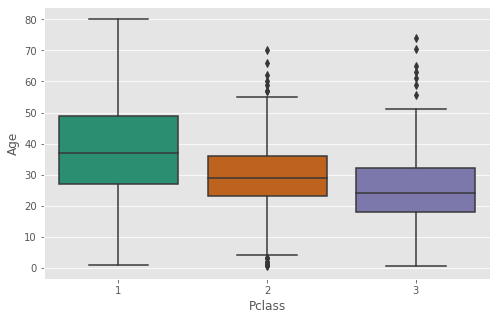

In [45]:
# tujuannya mengisi missing value di age

plt.figure(figsize = (8,5))
sns.boxplot(x="Pclass", y="Age", data=train, palette = "Dark2")
plt.show()

In [46]:
train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Dapat diamati bahwa:
- untuk kelas 1, rata-rata umurnya adalah 38.233441
- untuk kelas 2, rata-rata umurnya adalah 29.877630
- untuk kelas 3, rata-rata umurnya adalah 25.140620

In [47]:
# disini akan dimasukkan nilai missing value age dengan rata-rata age berdasarkan masing-masing Pclassnya

rata2_class1 = train["Age"][train["Pclass"]==1].mean()
rata2_class2 = train["Age"][train["Pclass"]==2].mean()
rata2_class3 = train["Age"][train["Pclass"]==3].mean()

In [48]:
# isi missing value dengan 0 terlebih dahulu
for data in train_test_data:
    data["Age"] = data["Age"].fillna(0)

In [49]:
train["Age"].value_counts()

0.00     177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
0.42       1
34.50      1
66.00      1
14.50      1
0.92       1
Name: Age, Length: 89, dtype: int64

In [50]:
test["Age"].value_counts()

0.0     86
24.0    17
21.0    17
22.0    16
30.0    15
        ..
67.0     1
11.5     1
34.5     1
28.5     1
60.5     1
Name: Age, Length: 80, dtype: int64

In [51]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,0,S,0


In [52]:
train.at[0,"Age"]

22.0

In [53]:
# ganti untuk train

for j in range(len(train)):
    
    if (train.at[j,"Age"] == 0):
        
        if (train.at[j,"Pclass"] == 1):
            train.at[j,"Age"] = rata2_class1
            
        elif (train.at[j,"Pclass"] == 2):
            train.at[j,"Age"] = rata2_class2
            
        else:
            train.at[j,"Age"] = rata2_class3           

In [54]:
for i in range(len(test)):
    
    if(test.at[i,"Age"] == 0):
        
        if(test.at[i,"Pclass"] == 1):
            test.at[i,"Age"] = rata2_class1
            
        elif(test.at[i,"Pclass"] == 2):
            test.at[i,"Age"] = rata2_class2
            
        else:
            test.at[i,"Age"] = rata2_class3

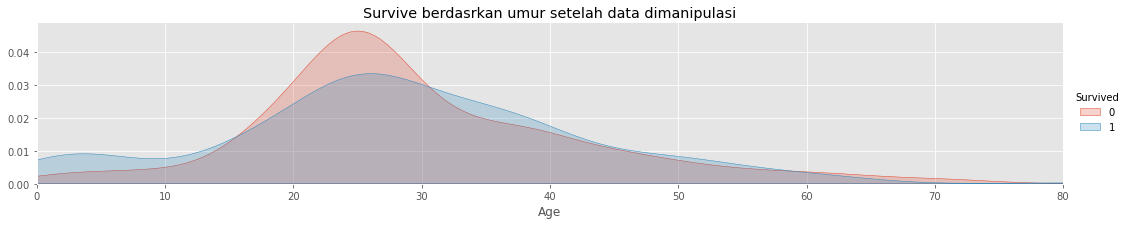

In [55]:
# melihat insight data berdasarkan age

fac = sns.FacetGrid(train, hue = "Survived", aspect = 5)

fac.map(sns.kdeplot, 'Age', shade=True)
fac.set(xlim=(0, train["Age"].max()))
fac.add_legend()

plt.title("Survive berdasrkan umur setelah data dimanipulasi")
plt.show()

Dapat diamati untuk masing-masing umur tingkat atau kesempatan bertahan hidupnya

#### Sex and Survived

In [56]:
# mengubah male menjadi 0 dan female menjadi 1

sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,25.14062,0,0,A.5. 3236,8.0500,0,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0
416,1308,3,"Ware, Mr. Frederick",0,25.14062,0,0,359309,8.0500,0,S,0


#### Embarked and Survived, PClass

In [57]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
dtype: int64

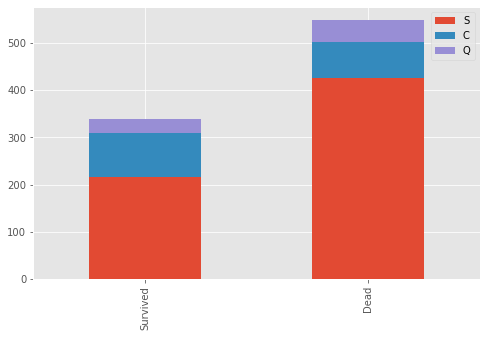

In [58]:
c1 = train[train['Survived']==1]['Embarked'].value_counts()
c2 = train[train['Survived']==0]['Embarked'].value_counts()

de = pd.DataFrame([c1, c2])
de.index = ['Survived','Dead']

de.plot(kind='bar', stacked=True, figsize=(8,5))
plt.show()

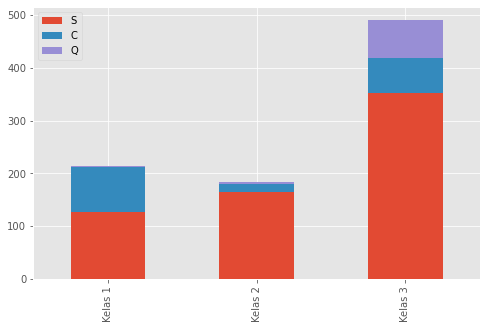

In [59]:
c1 = train[train['Pclass']==1]['Embarked'].value_counts()
c2 = train[train['Pclass']==2]['Embarked'].value_counts()
c3 = train[train['Pclass']==3]['Embarked'].value_counts()

de = pd.DataFrame([c1, c2, c3])
de.index = ['Kelas 1','Kelas 2', 'Kelas 3']

de.plot(kind='bar', stacked=True, figsize=(8,5))
plt.show()

In [60]:
# Untuk setiap kasus kematian, kesempatan bertahan hidup, dan juga kelas didominasi oleh S
# Jadi disini, untuk missing value diisi oleh S

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S,0


In [62]:
# ubah S -> 0 , C->1, Q->2

ubah_embarked = {"S": 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(ubah_embarked)

dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,2


#### Fare and Survived

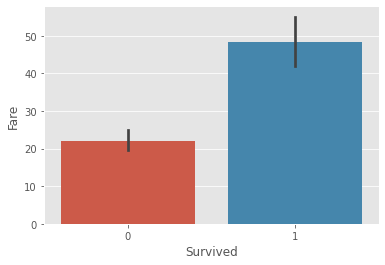

In [63]:
sns.barplot(x="Survived", y="Fare", data=train)

plt.show()

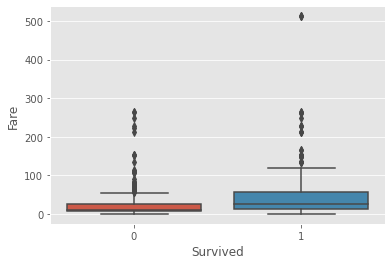

In [64]:
sns.boxplot(x="Survived", y="Fare", data=train)

plt.show()

In [65]:
# rata-rata berdasarkan Pclass

fare_1 = train["Fare"][train["Pclass"]==1].mean()
fare_2 = train["Fare"][train["Pclass"]==2].mean()
fare_3 = train["Fare"][train["Pclass"]==3].mean()

print("Rata2 fare untuk kelas 1 : ", fare_1)
print("Rata2 fare untuk kelas 2 ", fare_2)
print("Rata2 fare untuk kelas 3 ", fare_3)

Rata2 fare untuk kelas 1 :  84.15468749999992
Rata2 fare untuk kelas 2  20.66218315217391
Rata2 fare untuk kelas 3  13.675550101832997


In [66]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [67]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

In [68]:
# sama halnya dengan age, disini akan diisi missing value dengan rata-rata fare berdasarkan Pclassnya
# hanya ada di test missing valuenya

test["Fare"] = test["Fare"].fillna(0)

for i in range(len(test)):
    
    if (test.at[i,"Fare"] == 0):
        
        if (test.at[i,"Pclass"] == 1):
            test.at[i,"Fare"] = fare_1
            
        elif (test.at[i,"Pclass"] == 2):
            test.at[i,"Fare"] = fare_2
            
        else:
            test.at[i,"Fare"] = fare_3

#### SibSp and Parch

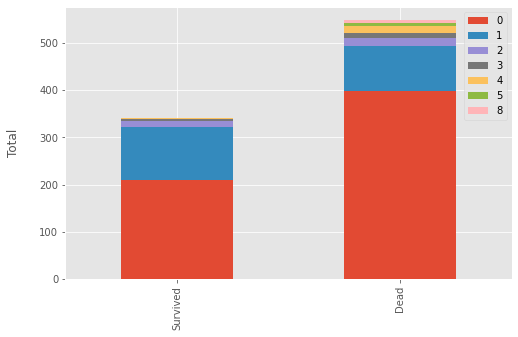

In [69]:
sibsp_1 = train[train["Survived"]==1]["SibSp"].value_counts()
sibsp_0 = train[train["Survived"]==0]["SibSp"].value_counts()

dt = pd.DataFrame([sibsp_1, sibsp_0])
dt.index = ['Survived', 'Dead']
dt.plot(kind = "bar", stacked = True, figsize=(8,5))

plt.ylabel('Total\n', fontsize = 12)
plt.show()

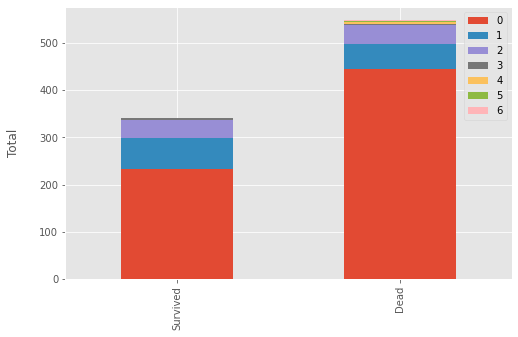

In [70]:
parch1 = train[train["Survived"]==1]["Parch"].value_counts()
parch0 = train[train["Survived"]==0]["Parch"].value_counts()

dq = pd.DataFrame([parch1, parch0])
dq.index = ['Survived', 'Dead']
dq.plot(kind = "bar", stacked = True, figsize=(8,5))

plt.ylabel('Total\n', fontsize = 12)
plt.show()

In [71]:
# SibPs dan Parch mewakili hal yang sama, karena jumlah keluarga penumpang.
# Andaikan sendiri dan untuk menghindari 0, ditambahkan dengan 1 (nilai diri sendiri)

train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1

<AxesSubplot:xlabel='Survived', ylabel='count'>

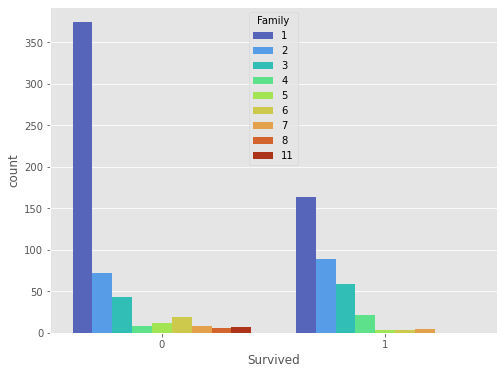

In [72]:
# plot berdasarkan keluarga (Family)

plt.figure(figsize = (8,6))

sns.countplot(x = "Survived", hue = "Family", data = train, palette = "turbo")

#### Menghapus kolom yang tidak perlu

In [73]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.2500,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.2833,1,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,1,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.00000,0,0,211536,13.0000,0,0,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.00000,0,0,112053,30.0000,1,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.14062,1,2,W./C. 6607,23.4500,0,0,1,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.00000,0,0,111369,30.0000,1,1,0,1


In [74]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,0,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,0,2,0,1
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,25.14062,0,0,A.5. 3236,8.0500,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1,1,3,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",0,25.14062,0,0,359309,8.0500,0,0,0,1


In [75]:
train = train.drop("Name", axis = 1)
train = train.drop("PassengerId", axis = 1)
train = train.drop("Embarked", axis = 1)
train = train.drop("Ticket", axis = 1)
train = train.drop("SibSp", axis = 1)
train = train.drop("Parch", axis = 1)

train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Title,Family
0,0,3,0,22.0,7.2500,0,0,2
1,1,1,1,38.0,71.2833,1,2,2
2,1,3,1,26.0,7.9250,0,1,1
3,1,1,1,35.0,53.1000,1,2,2
4,0,3,0,35.0,8.0500,0,0,1


In [76]:
test = test.drop("Name", axis = 1)
test = test.drop("Embarked", axis = 1)
test = test.drop("Ticket", axis = 1)
test = test.drop("SibSp", axis = 1)
test = test.drop("Parch", axis = 1)

test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Title,Family
0,892,3,0,34.5,7.8292,0,0,1
1,893,3,1,47.0,7.0000,0,2,2
2,894,2,0,62.0,9.6875,0,0,1
3,895,3,0,27.0,8.6625,0,0,1
4,896,3,1,22.0,12.2875,0,2,3


## Predict Siapa yang Survive dengan Machine Learning

In [79]:
X = train.drop('Survived', axis=1)
Y = train['Survived']

X.shape, Y.shape

((891, 7), (891,))

In [80]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Title,Family
0,3,0,22.0,7.2500,0,0,2
1,1,1,38.0,71.2833,1,2,2
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,1,2,2
4,3,0,35.0,8.0500,0,0,1


In [81]:
test.shape

(418, 8)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
 4   Cabin   891 non-null    object 
 5   Title   891 non-null    int64  
 6   Family  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [84]:
# bisa juga dengan kfold, disini pake train_test_split aja

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### Random Forest (Hasil akurasi 81.7)

In [85]:
clf_forest = RandomForestClassifier(random_state=0)

clf_forest.fit(X_train, y_train)

y_pred = clf_forest.predict(X_test)

print("Akurasi : ",accuracy_score(y_test,y_pred))

Akurasi :  0.8171641791044776


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       168
           1       0.77      0.73      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [87]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X,Y)

test_data = test.drop("PassengerId", axis=1).copy()
y_predict_test = clf_for.predict(test_data)

df_randomforest = pd.DataFrame()
df_randomforest["PassengerId"] = test["PassengerId"]

df_randomforest["Survived"] = y_predict_test
df_randomforest.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [89]:
df_randomforest.to_csv('sub_randomforest.csv', index=False)

### Decision Tree (Hasil akurasi 81.3)

In [90]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 5, random_state = 100) #max question or line

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

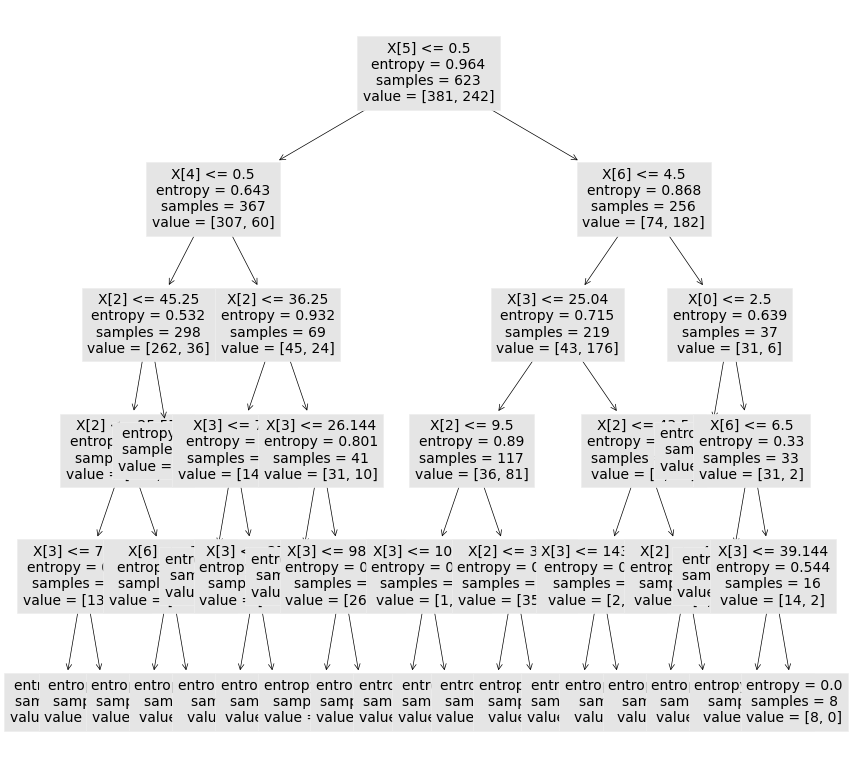

In [91]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 100
plt.subplots(figsize = (10,10))
tree.plot_tree(model, fontsize = 10)
plt.show()

In [92]:
y_pred = model.predict(X_test)

print("Akurasi data latih : ",accuracy_score(y_test,y_pred))

Akurasi data latih :  0.7947761194029851


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.74      0.69      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [94]:
depth = []

for i in range(1,11):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    
    y_pred = clf_tree.predict(X_test)
    
    depth.append(accuracy_score(y_test,y_pred))
    
    print("Max depth",i, " : ",accuracy_score(y_test,y_pred))

Max depth 1  :  0.7761194029850746
Max depth 2  :  0.7985074626865671
Max depth 3  :  0.8059701492537313
Max depth 4  :  0.8097014925373134
Max depth 5  :  0.7947761194029851
Max depth 6  :  0.7873134328358209
Max depth 7  :  0.8022388059701493
Max depth 8  :  0.8134328358208955
Max depth 9  :  0.7910447761194029
Max depth 10  :  0.7798507462686567


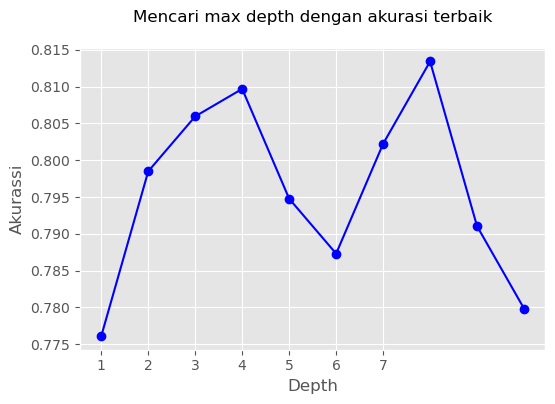

In [95]:
plt.plot(np.arange(1,11), depth, color="blue", marker = "o")

plt.xlabel("Depth")
plt.ylabel("Akurassi")
plt.title("Mencari max depth dengan akurasi terbaik\n", fontsize = 12)

plt.xticks(np.arange(1,8))

plt.show()

In [96]:
# Akurasi terbaik ada di max depth 8

clf = DecisionTreeClassifier(max_depth = 8)
clf.fit(X,Y)

test_data = test.drop("PassengerId", axis=1).copy()
y_predict_test = clf.predict(test_data)

df_decisiontree = pd.DataFrame()
df_decisiontree["PassengerId"] = test["PassengerId"]

df_decisiontree["Survived"] = y_predict_test
df_decisiontree.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [97]:
df_decisiontree.to_csv('sub_decisiontree.csv', index=False)

### KNN (Hasil akurasi 83.2)

Data akan distandarisasi

In [101]:
data_test = test.drop("PassengerId", axis=1).copy()

In [103]:
from sklearn.preprocessing import StandardScaler

standarisasi = StandardScaler()

X_knn = standarisasi.fit_transform(X)
data_test =  standarisasi.transform(data_test)

In [104]:
# bisa juga dengan kfold, disini pake train_test_split aja

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_knn, Y, test_size = 0.3, random_state = 0)

In [105]:
X_knn

array([[ 0.82737724, -0.73769513, -0.55236029, ..., -0.54492498,
        -0.73374551,  0.05915988],
       [-1.56610693,  1.35557354,  0.65947522, ...,  1.835115  ,
         1.33186981,  0.05915988],
       [ 0.82737724,  1.35557354, -0.24940141, ..., -0.54492498,
         0.29906215, -0.56097483],
       ...,
       [ 0.82737724,  1.35557354, -0.31449064, ..., -0.54492498,
         0.29906215,  1.29942929],
       [-1.56610693, -0.73769513, -0.24940141, ...,  1.835115  ,
        -0.73374551, -0.56097483],
       [ 0.82737724, -0.73769513,  0.20503691, ..., -0.54492498,
        -0.73374551, -0.56097483]])

In [106]:
data_test

array([[ 0.82737724, -0.73769513,  0.3943862 , ..., -0.54492498,
        -0.73374551, -0.56097483],
       [ 0.82737724,  1.35557354,  1.3411327 , ..., -0.54492498,
         1.33186981,  0.05915988],
       [-0.36936484, -0.73769513,  2.4772285 , ..., -0.54492498,
        -0.73374551, -0.56097483],
       ...,
       [ 0.82737724, -0.73769513,  0.69734508, ..., -0.54492498,
        -0.73374551, -0.56097483],
       [ 0.82737724, -0.73769513, -0.31449064, ..., -0.54492498,
        -0.73374551, -0.56097483],
       [ 0.82737724, -0.73769513, -0.31449064, ..., -0.54492498,
         2.36467747,  0.67929458]])

In [107]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Akurasi dengan k = ",5," : ",accuracy_score(y_test, y_pred))

Akurasi dengan k =  5  :  0.8246268656716418


In [108]:
neighbors = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    neighbors.append(accuracy_score(y_test,y_pred))
    
    print("Max depth",i, " : ",accuracy_score(y_test,y_pred))

Max depth 1  :  0.753731343283582
Max depth 2  :  0.7798507462686567
Max depth 3  :  0.8134328358208955
Max depth 4  :  0.8134328358208955
Max depth 5  :  0.8283582089552238
Max depth 6  :  0.8283582089552238
Max depth 7  :  0.832089552238806
Max depth 8  :  0.8208955223880597
Max depth 9  :  0.8246268656716418
Max depth 10  :  0.8246268656716418


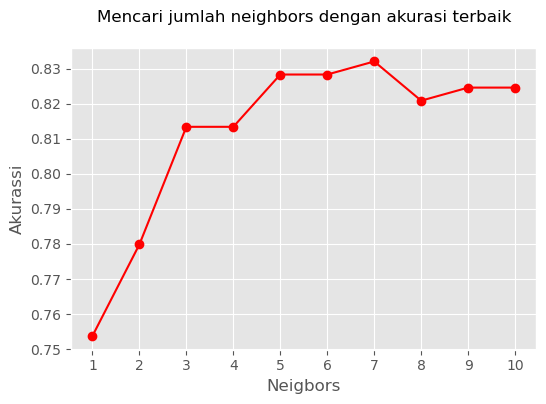

In [109]:
plt.plot(np.arange(1,11), neighbors, color="red", marker = "o")

plt.xlabel("Neigbors")
plt.ylabel("Akurassi")
plt.title("Mencari jumlah neighbors dengan akurasi terbaik\n", fontsize = 12)

plt.xticks(np.arange(1,11))

plt.show()

In [110]:
# Akurasi terbaik ada di neighbors = 7

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_knn,Y)

y_predict_test = knn.predict(data_test)

df_knn = pd.DataFrame()
df_knn["PassengerId"] = test["PassengerId"]

df_knn["Survived"] = y_predict_test
df_knn.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [111]:
df_knn.to_csv('sub_knn.csv', index=False)

### Dengan SVM (Hasil akurasi 82.0)

Disini masih menggunakan data yang sudah distandarisasi

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, Y, test_size = 0.3, random_state = 0)

In [113]:
model = SVC(random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8208955223880597


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.78      0.73      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [115]:
model = SVC(random_state = 0)
model.fit(X_knn, Y)

y_predict_test = model.predict(data_test)

df_svm = pd.DataFrame()
df_svm["PassengerId"] = test["PassengerId"]

df_svm["Survived"] = y_predict_test
df_svm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [116]:
df_svm.to_csv('sub_svm.csv', index=False)

### Naive Bayes

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [118]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7947761194029851

In [119]:
model.score(X_test, y_test)

0.7947761194029851

In [120]:
test_data = test.drop("PassengerId", axis=1).copy()
y_predict_test = model.predict(test_data)

df_nb = pd.DataFrame()
df_nb["PassengerId"] = test["PassengerId"]

df_nb["Survived"] = y_predict_test
df_nb.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [121]:
df_nb.to_csv('sub_naivebayes.csv', index=False)